In [22]:
%matplotlib inline
import numpy as np
mydata = np.loadtxt("C:/git_number/number_recognizer/data_text.txt")
mytarget = np.loadtxt("C:/git_number/number_recognizer/new_number.txt")

In [23]:
mydata.shape

(864, 64)

In [24]:
mytarget.shape

(864,)

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=0.0023, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False):
             precision    recall  f1-score   support

        0.0       0.56      0.39      0.46        49
        1.0       0.62      0.86      0.72        28
        2.0       0.37      0.62      0.46        48
        3.0       0.29      0.42      0.34        50
        4.0       0.55      0.40      0.46        43
        5.0       0.33      0.15      0.20        41
        6.0       0.40      0.54      0.46        39
        7.0       0.50      0.33      0.39        43
        8.0       0.65      0.40      0.49        50
        9.0       0.36      0.39      0.38        41

avg / total       0.46      0.44      0.43       432


Confusion matrix:
[[19  0 11  7  1  1  4  3  3  0]
 [ 0 24  0  1  0  1  1  0  0  1]
 [ 1  2 30  9  0  1  3  1  0  1]
 [ 2  1 14 21

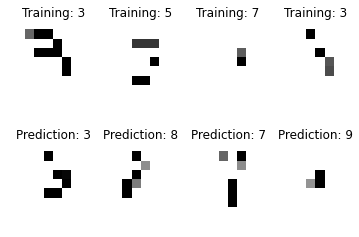

In [30]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics


#digits = datasets.load_digits()
#images_and_labels = list(zip(digits.images, digits.target))
images_and_labels = list(zip(mydata, mytarget))

for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    image=np.reshape(image,(8,8))
    
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(mydata)
#n_samples = len(digits.images)

data = mydata.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.0023)

# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples / 2], mytarget[:n_samples / 2])
#classifier.fit(data[:n_samples / 2], digits.target[:n_samples / 2])

# Now predict the value of the digit on the second half:
expected = mytarget[n_samples / 2:]
#expected = digits.target[n_samples / 2:]
predicted = classifier.predict(data[n_samples / 2:])

print("Classification report for classifier %s:\n%s\n"
    % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s"
    % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(
                        zip(mydata[n_samples / 2:], predicted))
'''
images_and_predictions = list(
                        zip(digits.images[n_samples / 2:], predicted))
                        '''
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    image=np.reshape(image,(8,8))
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

In [31]:
from sklearn.externals import joblib

joblib.dump(classifier, "./machine_new.pkl") 

['./machine_new.pkl',
 './machine_new.pkl_01.npy',
 './machine_new.pkl_02.npy',
 './machine_new.pkl_03.npy',
 './machine_new.pkl_04.npy',
 './machine_new.pkl_05.npy',
 './machine_new.pkl_06.npy',
 './machine_new.pkl_07.npy',
 './machine_new.pkl_08.npy',
 './machine_new.pkl_09.npy',
 './machine_new.pkl_10.npy',
 './machine_new.pkl_11.npy']